In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Airlines_Data.xlsx to Airlines_Data (1).xlsx


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing data
df = pd.read_excel(r'Airlines_Data.xlsx')



In [ ]:
#Printing head
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
df.shape

(96, 2)

In [49]:
df.isnull().sum()


Passengers    0
dtype: int64

In [50]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<Axes: xlabel='Month', ylabel='Passengers'>

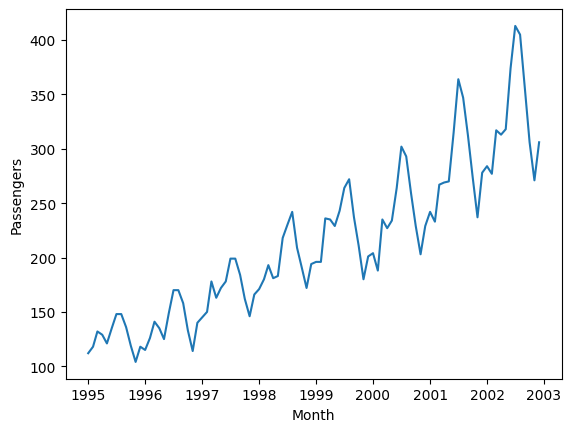

In [53]:
sns.lineplot(x='Month', y='Passengers', data=df)

<Axes: xlabel='Passengers', ylabel='Count'>

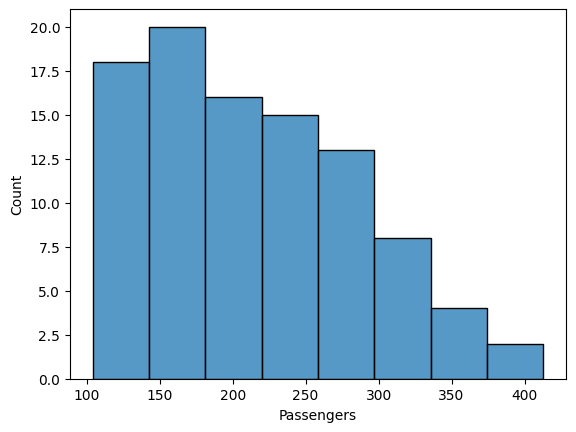

In [54]:
sns.histplot(data=df, x='Passengers')

In [ ]:
df['Passengers'].value_counts()

229    3
118    2
306    2
235    2
135    2
      ..
218    1
230    1
209    1
191    1
271    1
Name: Passengers, Length: 80, dtype: int64

In [ ]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [ ]:
df['Month'].min(), df['Month'].max()

(Timestamp('1995-01-01 00:00:00'), Timestamp('2002-12-01 00:00:00'))

In [ ]:
df=df[['Month','Passengers']]
df.shape

(96, 2)

In [ ]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
df = df.sort_values('Month',ascending=True)
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
df.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [ ]:
df['Month'].value_counts()

1995-01-01    1
1995-02-01    1
2000-11-01    1
2000-10-01    1
2000-09-01    1
             ..
1997-06-01    1
1997-05-01    1
1997-04-01    1
1997-03-01    1
2002-12-01    1
Name: Month, Length: 96, dtype: int64

In [ ]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
#df = df.groupby('Month')['Passengers'].sum().reset_index()
#df.shape

In [ ]:
#df.head(10)

In [ ]:
df = df.set_index('Month')

In [ ]:
df.head(10)

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


In [ ]:
y = df['Passengers'].resample("M").mean()

In [ ]:
print(y.shape)
y

(96,)


Month
1995-01-31    112.0
1995-02-28    118.0
1995-03-31    132.0
1995-04-30    129.0
1995-05-31    121.0
              ...  
2002-08-31    405.0
2002-09-30    355.0
2002-10-31    306.0
2002-11-30    271.0
2002-12-31    306.0
Freq: M, Name: Passengers, Length: 96, dtype: float64

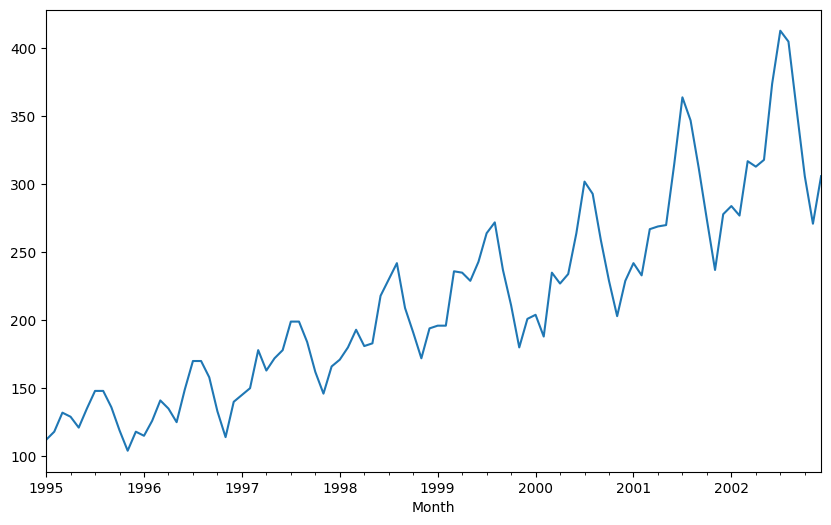

In [ ]:
y.plot(figsize=(10,6))
plt.show()

In [ ]:
train=y.loc[:'2000-12-01']
print(train.shape)
train

(71,)


Month
1995-01-31    112.0
1995-02-28    118.0
1995-03-31    132.0
1995-04-30    129.0
1995-05-31    121.0
              ...  
2000-07-31    302.0
2000-08-31    293.0
2000-09-30    259.0
2000-10-31    229.0
2000-11-30    203.0
Freq: M, Name: Passengers, Length: 71, dtype: float64

In [ ]:
test = y.loc['2000-12-01':]
print(test.shape)
test

(25,)


Month
2000-12-31    229.0
2001-01-31    242.0
2001-02-28    233.0
2001-03-31    267.0
2001-04-30    269.0
2001-05-31    270.0
2001-06-30    315.0
2001-07-31    364.0
2001-08-31    347.0
2001-09-30    312.0
2001-10-31    274.0
2001-11-30    237.0
2001-12-31    278.0
2002-01-31    284.0
2002-02-28    277.0
2002-03-31    317.0
2002-04-30    313.0
2002-05-31    318.0
2002-06-30    374.0
2002-07-31    413.0
2002-08-31    405.0
2002-09-30    355.0
2002-10-31    306.0
2002-11-30    271.0
2002-12-31    306.0
Freq: M, Name: Passengers, dtype: float64

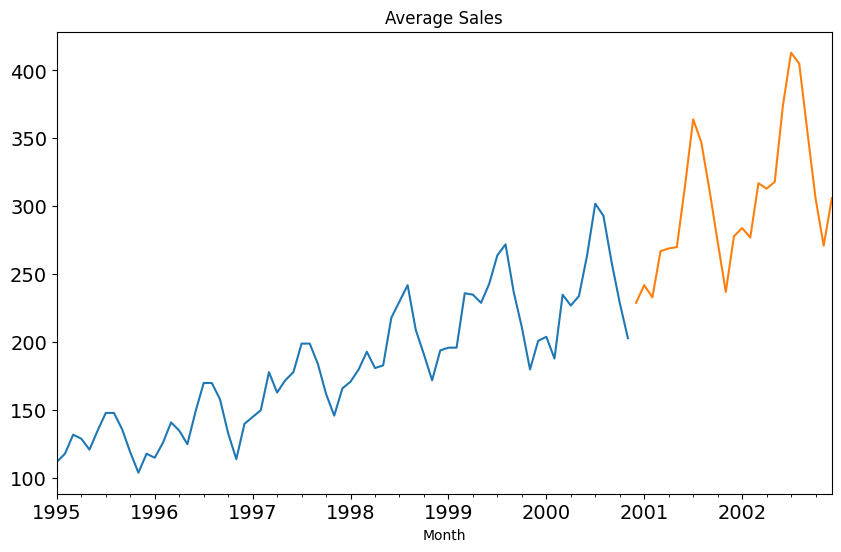

In [ ]:
#plotting data
train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()

# Simple Exponential Smoothing Model

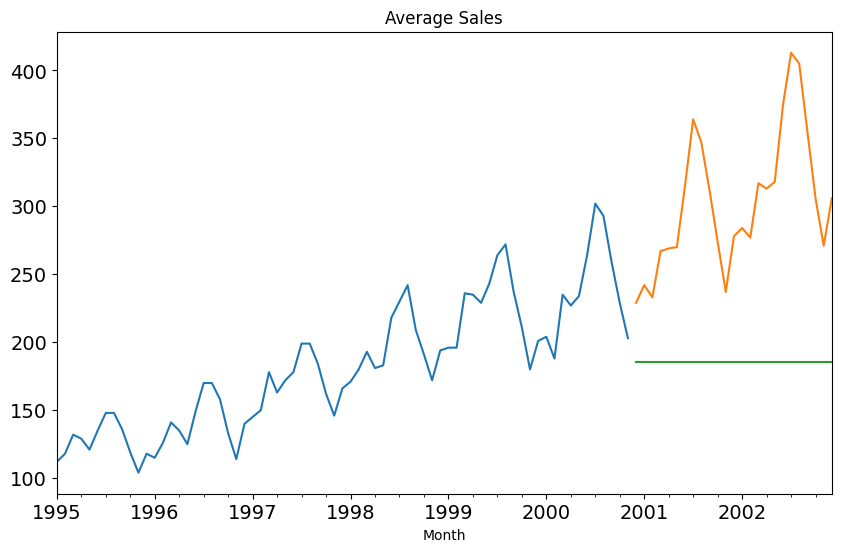

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [ ]:
Exp_Smooth.SES

2000-12-31    185.148759
2001-01-31    185.148759
2001-02-28    185.148759
2001-03-31    185.148759
2001-04-30    185.148759
2001-05-31    185.148759
2001-06-30    185.148759
2001-07-31    185.148759
2001-08-31    185.148759
2001-09-30    185.148759
2001-10-31    185.148759
2001-11-30    185.148759
2001-12-31    185.148759
2002-01-31    185.148759
2002-02-28    185.148759
2002-03-31    185.148759
2002-04-30    185.148759
2002-05-31    185.148759
2002-06-30    185.148759
2002-07-31    185.148759
2002-08-31    185.148759
2002-09-30    185.148759
2002-10-31    185.148759
2002-11-30    185.148759
2002-12-31    185.148759
Freq: M, dtype: float64

In [ ]:
#AIC is used to compare different models with same Algo but differrent data/parameter
#choose the model with lowest AIC value

fit1.aic

549.8724407750586

In [ ]:
#RMSE is used to compare different models with same Algo but differrent data/parameter
#choose the model with lowest RMSE value

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

128.00774640908085


# Holt Model

<ipython-input-28-5b507763a150>:7: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope = 0.25)


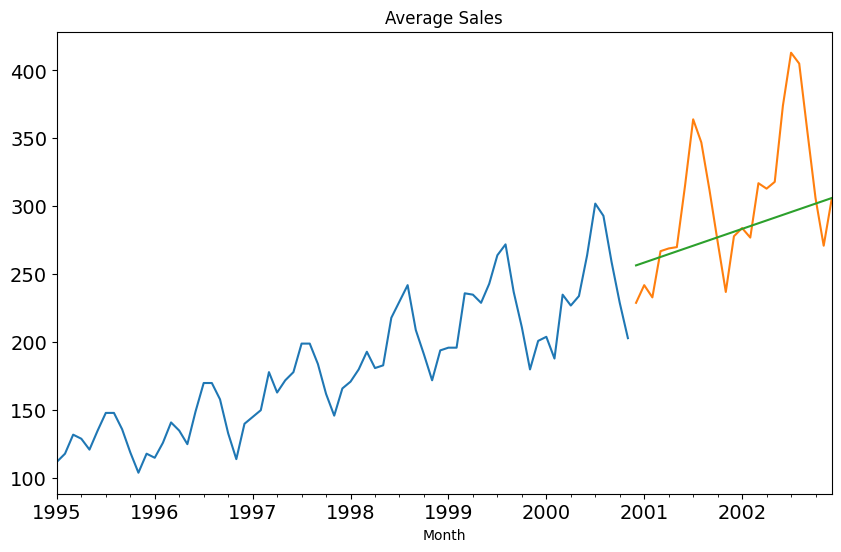

In [ ]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing level=beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope = 0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [ ]:

fit1.aic

457.85422201511875

In [ ]:
Holt_df['Holt_linear']

2000-12-31    256.542619
2001-01-31    258.608141
2001-02-28    260.673664
2001-03-31    262.739186
2001-04-30    264.804708
2001-05-31    266.870231
2001-06-30    268.935753
2001-07-31    271.001275
2001-08-31    273.066798
2001-09-30    275.132320
2001-10-31    277.197842
2001-11-30    279.263365
2001-12-31    281.328887
2002-01-31    283.394409
2002-02-28    285.459932
2002-03-31    287.525454
2002-04-30    289.590976
2002-05-31    291.656498
2002-06-30    293.722021
2002-07-31    295.787543
2002-08-31    297.853065
2002-09-30    299.918588
2002-10-31    301.984110
2002-11-30    304.049632
2002-12-31    306.115155
Freq: M, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

48.67777267358759


# Holt-Winter Model

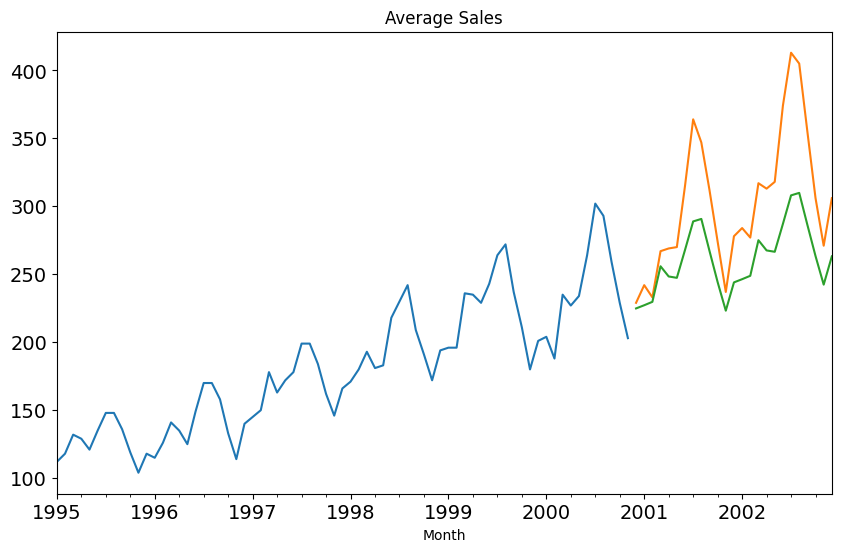

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#smoothing level=gama
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(train , seasonal_periods=12,
                           trend='add',
                           seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [ ]:
Holt_Winter_df['Holt_Winter']

2000-12-31    224.869979
2001-01-31    227.218773
2001-02-28    229.718093
2001-03-31    255.885154
2001-04-30    248.384864
2001-05-31    247.386116
2001-06-30    267.884877
2001-07-31    288.885364
2001-08-31    290.718325
2001-09-30    267.219400
2001-10-31    244.220540
2001-11-30    223.221473
2001-12-31    244.033837
2002-01-31    246.382631
2002-02-28    248.881951
2002-03-31    275.049012
2002-04-30    267.548722
2002-05-31    266.549975
2002-06-30    287.048735
2002-07-31    308.049222
2002-08-31    309.882183
2002-09-30    286.383258
2002-10-31    263.384398
2002-11-30    242.385331
2002-12-31    263.197695
Freq: M, dtype: float64

In [ ]:
fit1.aic

323.55958856208616

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

49.8188044289901


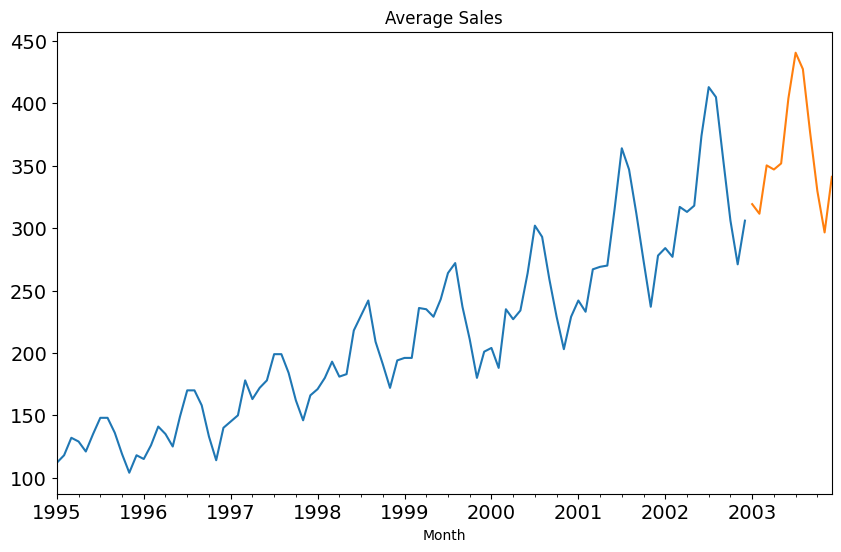

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods = gamma
fit1 = ExponentialSmoothing(y , seasonal_periods=12,
                           trend='add',
                           seasonal='add').fit()

#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [ ]:
Y_predictions

2003-01-31    319.235270
2003-02-28    311.528386
2003-03-31    350.278691
2003-04-30    346.984976
2003-05-31    351.845022
2003-06-30    403.925707
2003-07-31    440.566797
2003-08-31    427.446477
2003-09-30    376.628169
2003-10-31    329.767502
2003-11-30    296.561275
2003-12-31    341.114757
Freq: M, dtype: float64

In [ ]:
fit1.aic

475.7544194480355

In [ ]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pmdarima as pm

In [ ]:
# Box-Jenkins Method:
# 1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
# 2.Estimation-build the model using the optimum values
# 3.Validation-interpret how good is the model by validation testing
# 4.Forecasting- forecast for future time periods

In [ ]:

model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.50 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.32 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.71 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.09 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.20 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.15 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.42 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=617.784, Time=0.56 sec

Best model:  ARIMA(1,1,0)(1,1,0)[12]

In [ ]:
model.aic()

615.9653075398163

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
               order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

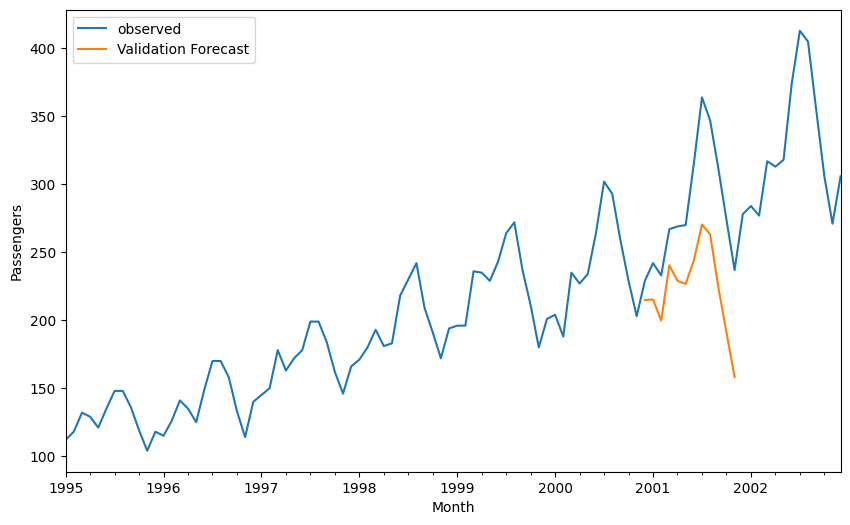

In [ ]:

pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['1995':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Month')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

In [ ]:
pred.predicted_mean

2000-12-31    214.868178
2001-01-31    215.289903
2001-02-28    199.756633
2001-03-31    240.518899
2001-04-30    229.032441
2001-05-31    226.686048
2001-06-30    244.032536
2001-07-31    270.432519
2001-08-31    263.338587
2001-09-30    224.516253
2001-10-31    191.022070
2001-11-30    158.252938
Freq: M, Name: predicted_mean, dtype: float64